# Temperature Forecast Project using ML

# Data Description

Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Exploratory Data Analysis 

# Importing required Libariries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

# Importing Dataset

In [3]:
df=pd.read_csv('Temparature.csv')
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.shape #checking the data dimension

(7752, 25)

We have 7752 rows and 25 columns including the target column.

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df['Next_Tmax'].mean()  #Check the mean value for maximum Temperature

30.274886731391593

In [8]:
df['Next_Tmin'].mean()     #Check the mean value for minimum Temperature

22.93222006472492

# Graphical Representation

Text(0.5, 1.0, 'Maximum Temperature Prediction')

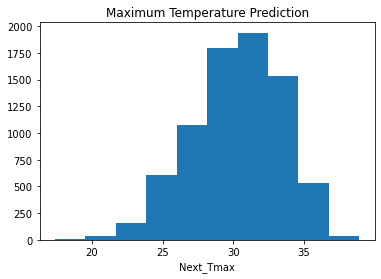

In [9]:
#Histogram plot for Next Tmax for data.
plt.hist(df['Next_Tmax'])
plt.xlabel('Next_Tmax')
plt.title('Maximum Temperature Prediction')

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

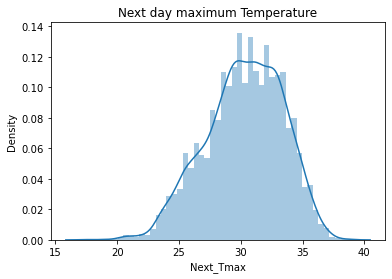

In [10]:
#Distplot for Next Tmax for data.
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot clears that next day maximum temparature distribution is lies between 22 to 37.

Text(0.5, 1.0, 'Minimum Temperature Prediction')

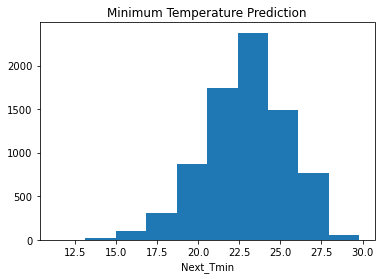

In [11]:
#Histogram plot for Next Tmin for data.
plt.hist(df['Next_Tmin'])
plt.xlabel('Next_Tmin')
plt.title('Minimum Temperature Prediction')

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

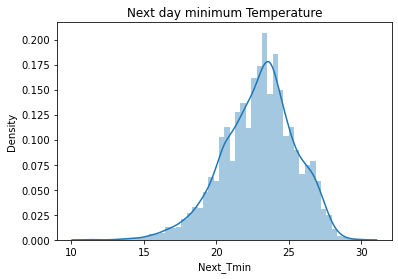

In [12]:
#Distplot for Next Tmin for data.
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The distplot clears that next day minimum temparature distribution is lies between 15 to 28.

Text(0, 0.5, 'Next_Tmax')

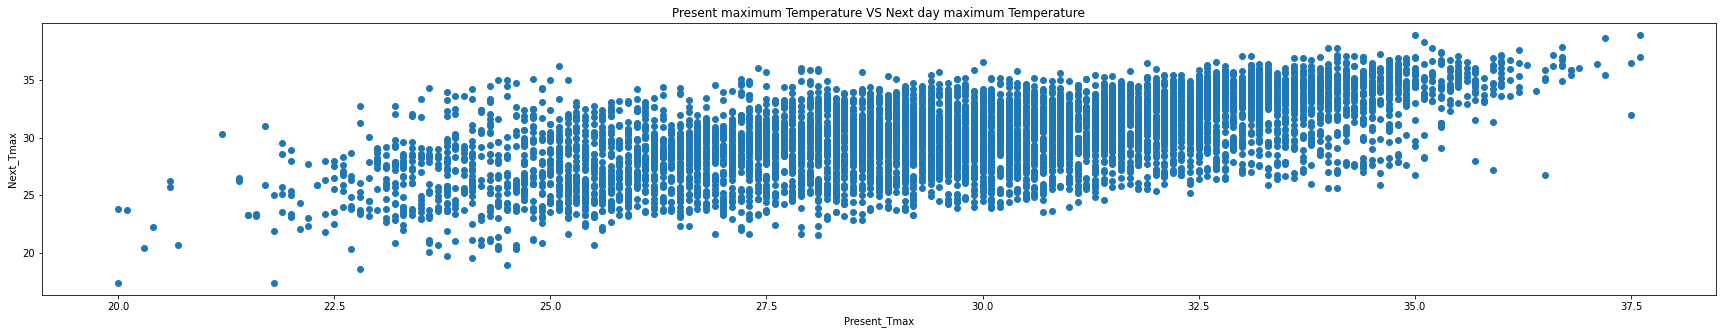

In [13]:
# Scatterplot for Present Tmax vs Next Tmax for data.
plt.figure(figsize=(30,5))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
plt.scatter(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

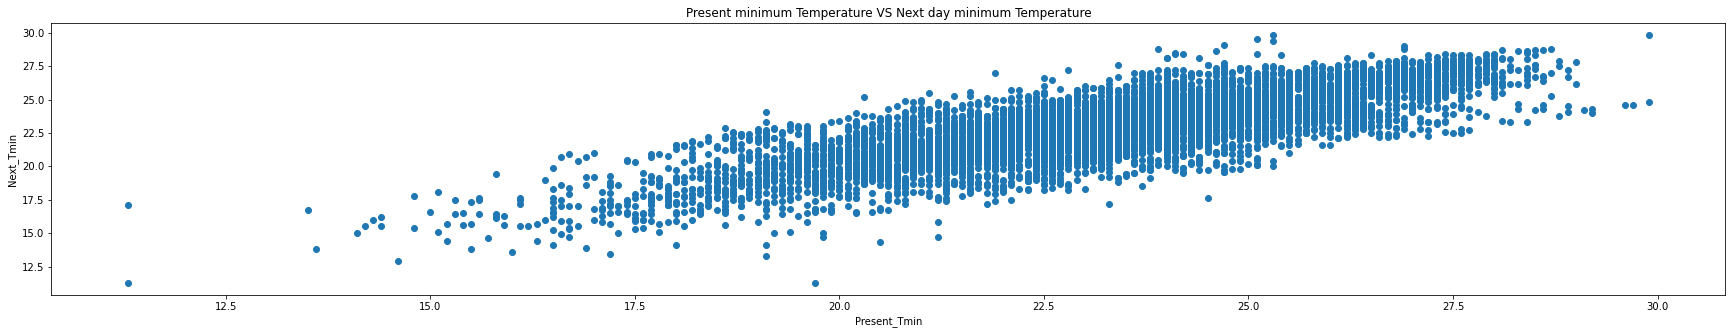

In [14]:
# Scatterplot for Present Tmin vs Next Tmin for data.
plt.figure(figsize=(30,5))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
plt.scatter(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax'>

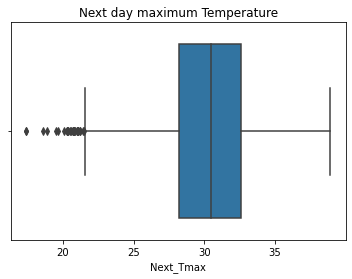

In [15]:
# Boxplot for Next Tmax for data.
plt.title('Next day maximum Temperature')
sns.boxplot(df['Next_Tmax'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be next day maximum temperature.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin'>

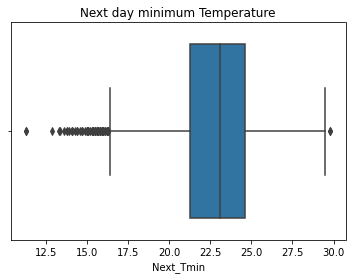

In [16]:
# Boxplot for Next Tmin for data.
plt.title('Next day minimum Temperature')
sns.boxplot(df['Next_Tmin'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be next day minimum temperature.

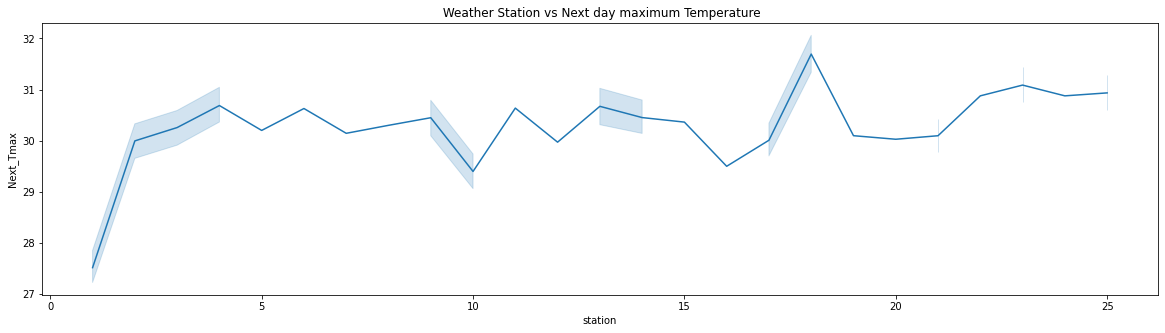

In [17]:
# Lineplot for Station vs Next Tmax fordata.
plt.figure(figsize=(20,5))
plt.title(' Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

The line plot clears that next day maximum temparature is high & low at station 18 & 10 respectively.

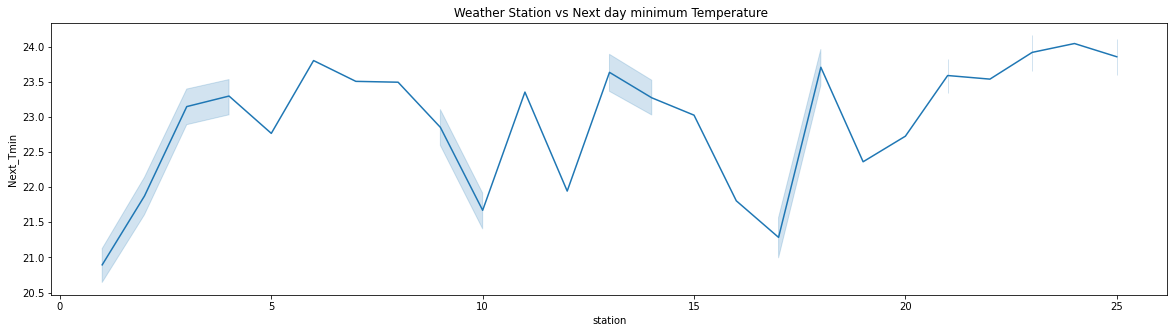

In [18]:
# Lineplot for Station vs Next Tmin for train data.
plt.figure(figsize=(20,5))
plt.title(' Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

The line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

Text(0, 0.5, 'Next_Tmax')

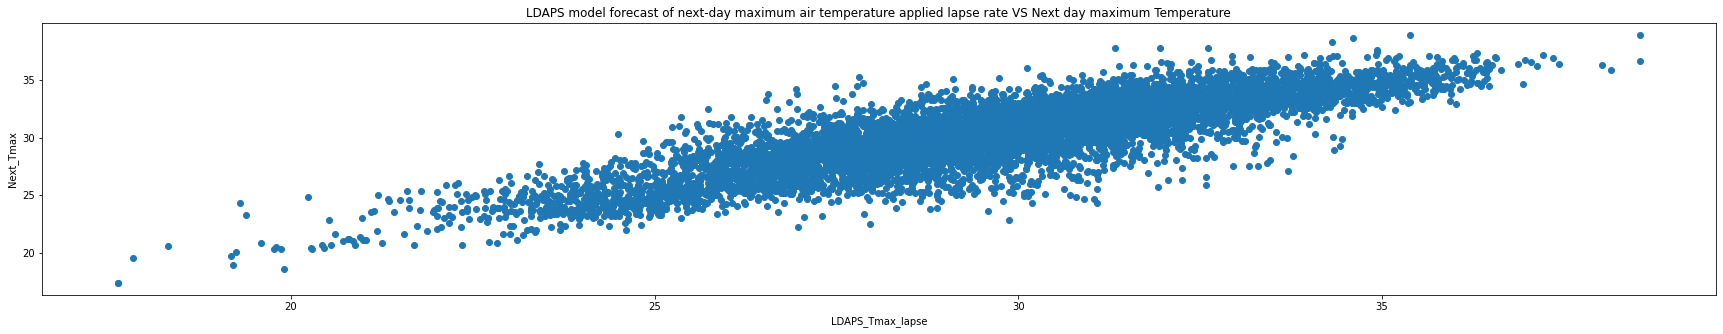

In [19]:
# Scatterplot for LDAPS_Tmax_lapse vs Next Tmin for data.
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day maximum air temperature applied lapse rate VS Next day maximum Temperature')
plt.scatter(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

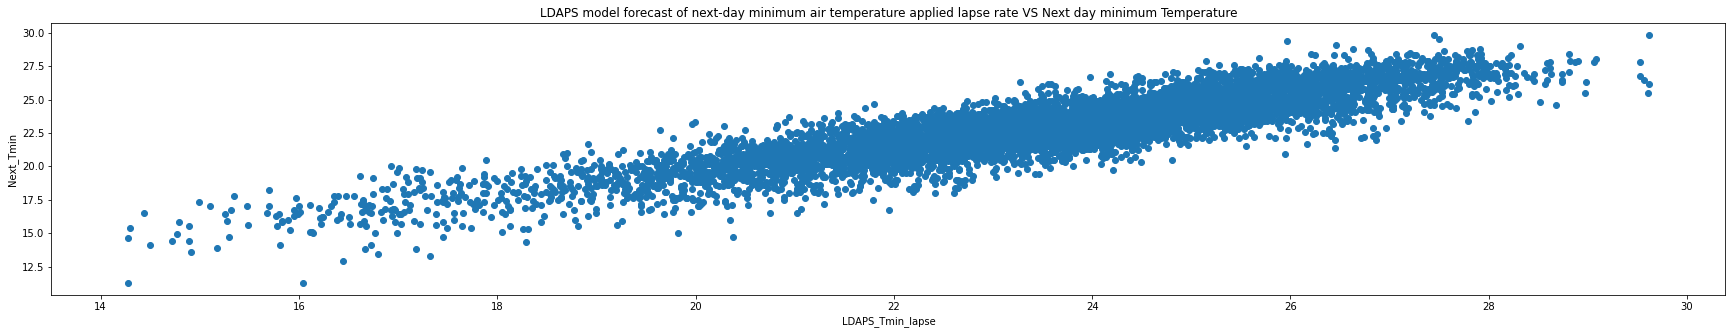

In [20]:
# Scatterplot for LDAPS_Tmin_lapse vs Next Tmin for data.
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day minimum air temperature applied lapse rate VS Next day minimum Temperature')
plt.scatter(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

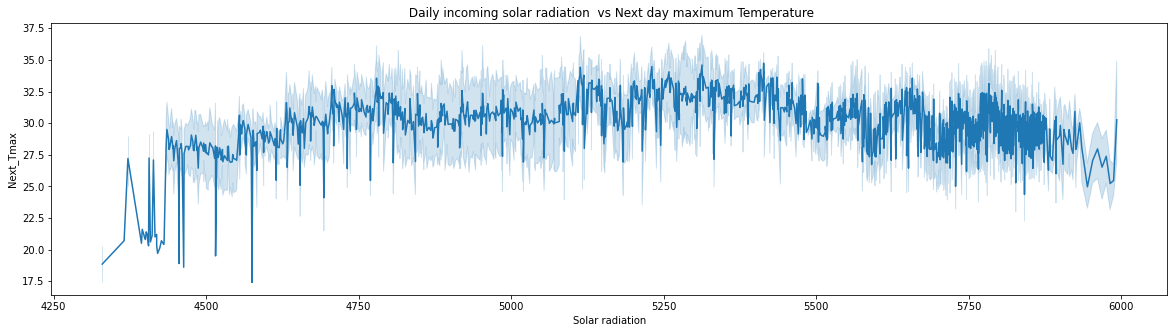

In [21]:
# Lineplot for Solar radiation vs Next Tmax for data.
plt.figure(figsize=(20,5))
plt.title(' Daily incoming solar radiation  vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

According to solar radiation, the next day maximum temparature is frequently increases.

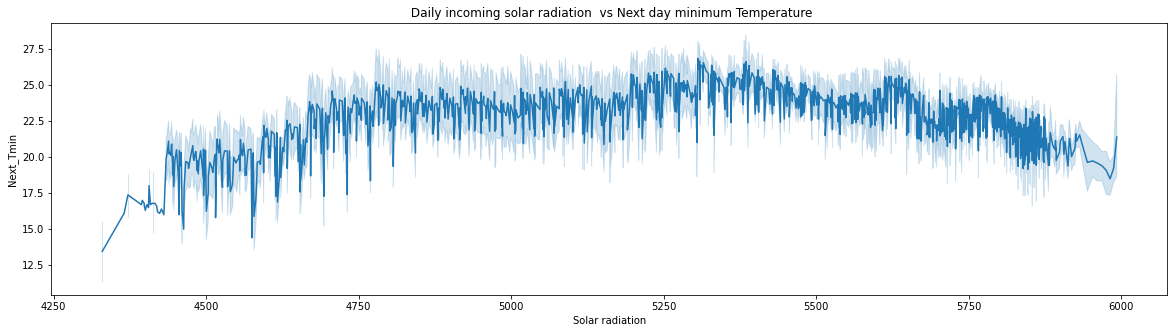

In [22]:
# Lineplot for Solar radiation vs Next Tmin for data.
plt.figure(figsize=(20,5))
plt.title(' Daily incoming solar radiation  vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

According to solar radiation, the next day minimum temparature is frequently increases.

# Graphical Representation Conclusion

The columns included in data has plays vital role for target variables.so we are not going to drop any of the columns.

# Preprocessing

In [23]:
df.describe()#statistics summary for numerical columns

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

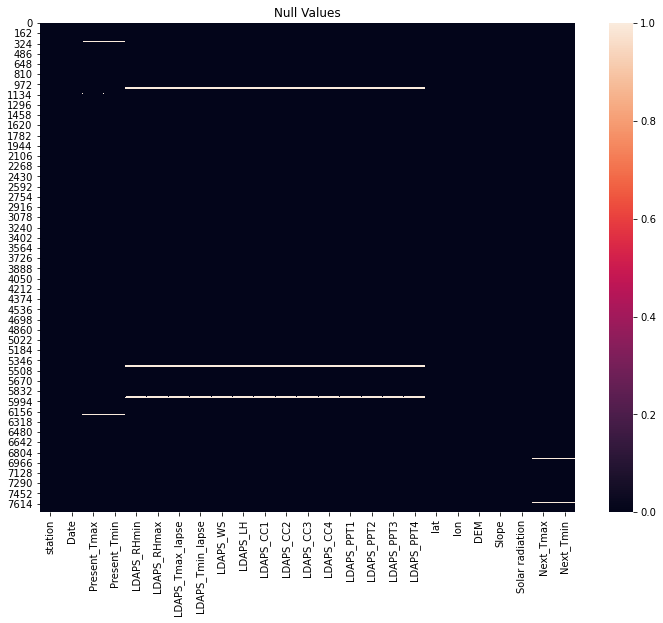

In [24]:
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [25]:
#Checking the null values in dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [26]:
#filling the missing values for numerical terms by mean
df['station']=df['station'].fillna(df['station'].mean())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [27]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [28]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [29]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Converting all Object attributes into Numerical attributes by using LabelEncoder

In [30]:
df.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [31]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [32]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [33]:
df.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [34]:
df.describe()

station           Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count  7752.000000    7752.000000   7752.000000   7752.000000  7752.000000   
mean     13.000000  735608.827012     29.768211     23.225059    56.759372   
std       7.210637   11829.341785      2.956557      2.403036    14.596973   
min       1.000000       1.000000     20.000000     11.300000    19.794666   
25%       7.000000  735427.000000     27.800000     21.700000    46.046162   
50%      13.000000  735807.000000     29.900000     23.400000    55.313244   
75%      19.000000  736199.000000     32.000000     24.900000    67.038254   
max      25.000000  736671.000000     37.600000     29.900000    98.524734   

       LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count  7752.000000       7752.000000       7752.000000  7752.000000   
mean     88.374804         29.613447         23.512589     7.097875   
std       7.157124          2.932898          2.333973     2.173245   
min      58.936283         17.624954         14.272646     2.882580   
25%      84.316923         27.693091         22.114651     5.686487   
50%      89.699505         29.662273         23.735942     6.563068   
75%      93.704500         31.683819         25.134000     8.007471   
max     100.000153         38.542255         29.619342    21.857621   

          LDAPS_LH  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean     62.505019  ...     0.485003     0.278200     0.269407    37.544722   
std      33.567001  ...     1.754258     1.156174     1.200364     0.050352   
min     -13.603212  ...     0.000000     0.000000     0.000000    37.456200   
25%      37.532764  ...     0.000000     0.000000     0.000000    37.510200   
50%      57.310630  ...     0.000000     0.000000     0.000000    37.550700   
75%      83.904586  ...     0.024276     0.009697     0.000693    37.577600   
max     213.414006  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 25 columns]

<AxesSubplot:>

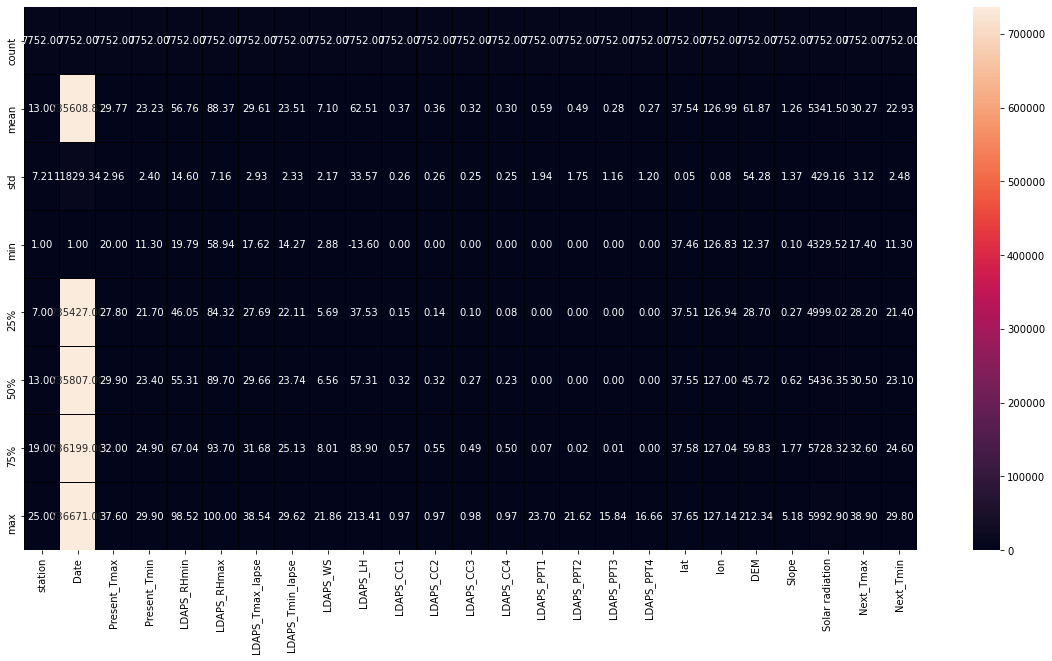

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [36]:
dfcor=df.corr()
dfcor

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000  0.000000      0.112655      0.131646    -0.066733   
Date              0.000000  1.000000      0.007766      0.019074    -0.003083   
Present_Tmax      0.112655  0.007766      1.000000      0.618760    -0.204571   
Present_Tmin      0.131646  0.019074      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066733 -0.003083     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166984  0.013541     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069107  0.008840      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.104758  0.010287      0.623496      0.762993     0.089476   
LDAPS_WS          0.005277 -0.044282     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133357 -0.015528      0.135463     -0.009258    -0.070858   
LDAPS_CC1         0.006919 -0.010413     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003396 -0.010414     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000694 -0.006590     -0.144018     -0.002772     0.689679   
LDAPS_CC4         0.006126 -0.007504     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -0.002709 -0.097386     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -0.008250 -0.096594     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -0.012461 -0.103827     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -0.010401 -0.106507     -0.099607     -0.062965     0.168595   
lat              -0.237502 -0.001874     -0.052615     -0.078475     0.087099   
lon              -0.118704  0.002202      0.009020     -0.043461    -0.076237   
DEM              -0.255830 -0.014928     -0.187121     -0.250275     0.102115   
Slope            -0.090061 -0.016177     -0.105809     -0.146339     0.123744   
Solar radiation  -0.019001  0.004326     -0.025439      0.053578     0.244080   
Next_Tmax         0.107983  0.013306      0.610348      0.471806    -0.437898   
Next_Tmin         0.128293  0.016178      0.622741      0.796670     0.095019   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Date                 0.013541          0.008840          0.010287 -0.044282   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax       

<AxesSubplot:>

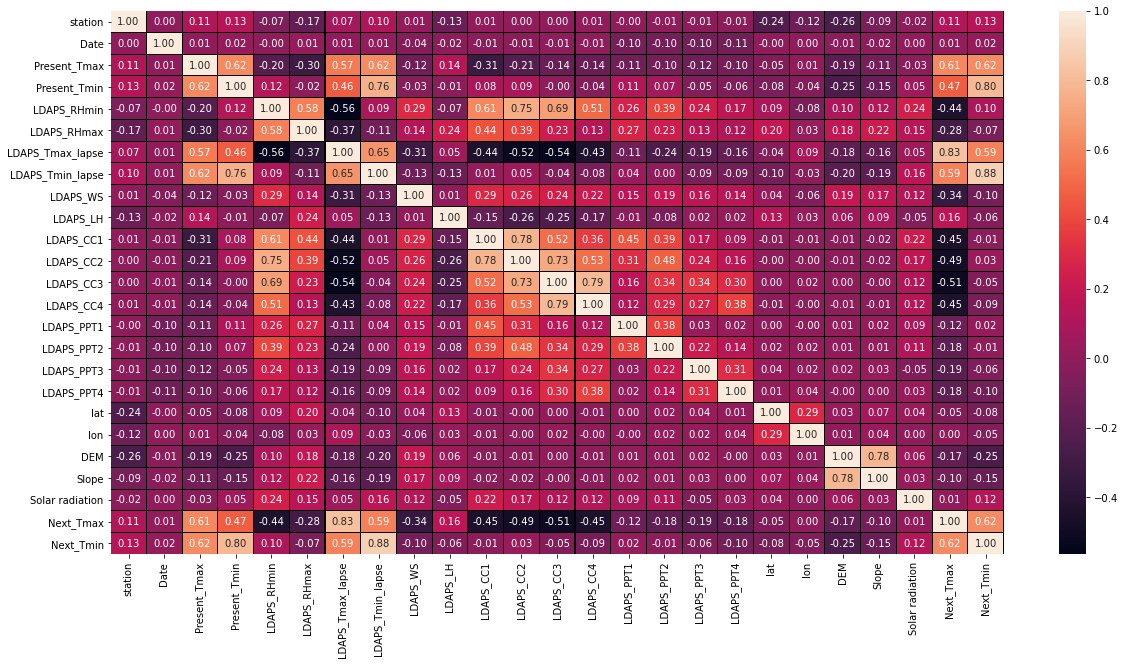

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

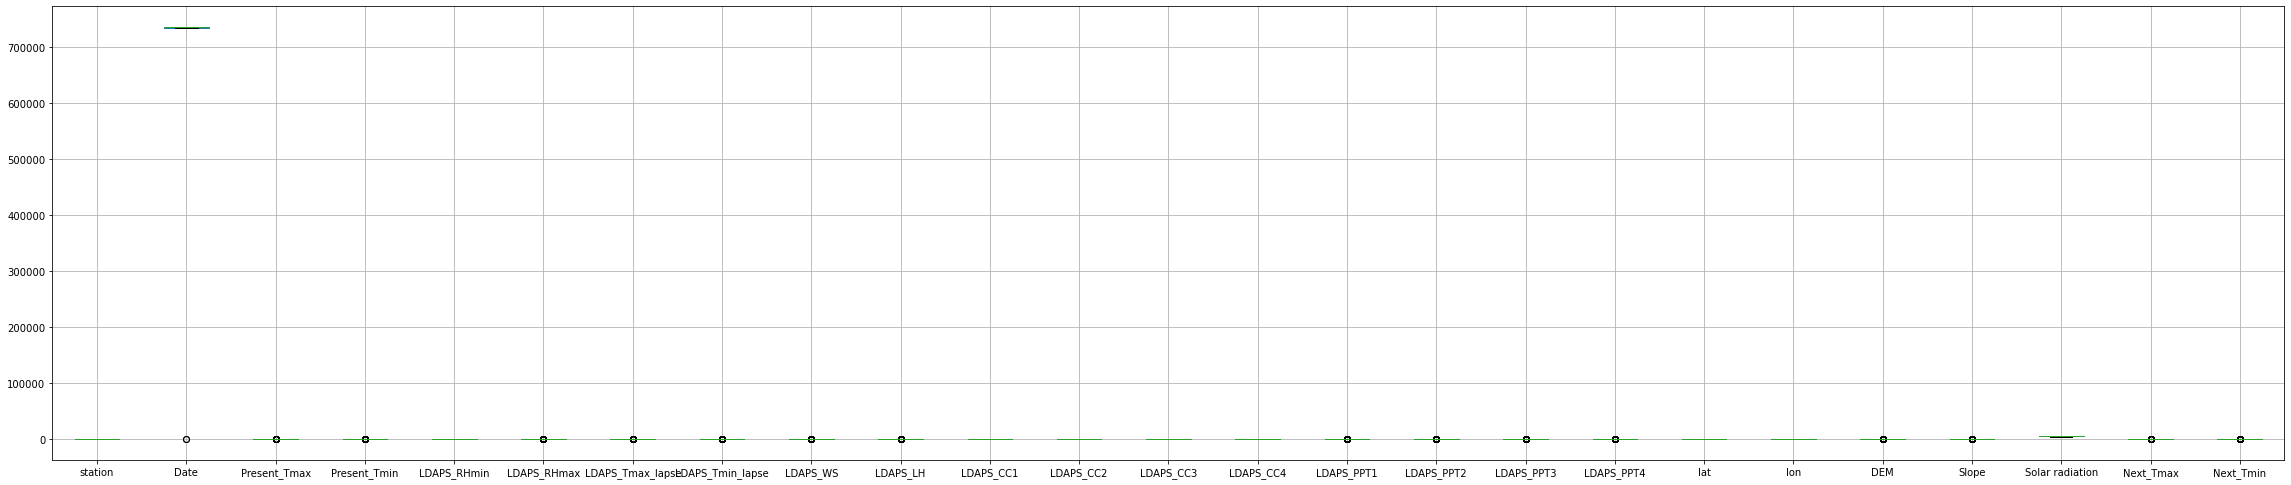

In [38]:
df.boxplot(figsize=[40,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))
z

array([[1.66431530e+00, 4.73283412e-02, 3.61325771e-01, ...,
        1.51793488e+00, 3.76282142e-01, 6.97599301e-01],
       [1.52562236e+00, 4.73283412e-02, 7.21084007e-01, ...,
        1.22994952e+00, 7.20972505e-02, 1.74063574e-01],
       [1.38692941e+00, 4.73283412e-02, 6.19608090e-01, ...,
        1.21653443e+00, 2.64259847e-01, 3.89744132e-01],
       ...,
       [1.66431530e+00, 8.13430765e-02, 2.22171758e+00, ...,
        2.07432510e+00, 7.92634435e-01, 2.22793450e+00],
       [0.00000000e+00, 6.21890289e+01, 3.30412736e+00, ...,
        2.35821196e+00, 4.12345278e+00, 4.68452522e+00],
       [0.00000000e+00, 6.21890289e+01, 2.64912642e+00, ...,
        1.51793488e+00, 2.76237361e+00, 2.76579089e+00]])

In [41]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [42]:
df.shape

(7752, 25)

In [43]:
df_new.shape

(6894, 25)

In [44]:
Data_loss=((7752-6894)/7752*100)
Data_loss

11.06811145510836

# Checking Skewness of the dataset

In [45]:
df.skew()

station              0.000000
Date               -62.064166
Present_Tmax        -0.264137
Present_Tmin        -0.367538
LDAPS_RHmin          0.300220
LDAPS_RHmax         -0.855015
LDAPS_Tmax_lapse    -0.227880
LDAPS_Tmin_lapse    -0.581763
LDAPS_WS             1.579236
LDAPS_LH             0.673757
LDAPS_CC1            0.459458
LDAPS_CC2            0.472350
LDAPS_CC3            0.640735
LDAPS_CC4            0.666482
LDAPS_PPT1           5.393821
LDAPS_PPT2           5.775355
LDAPS_PPT3           6.457129
LDAPS_PPT4           6.825464
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -0.340200
Next_Tmin           -0.404447
dtype: float64

In [46]:
x= df.drop('Next_Tmax',axis=1)
y= df['Next_Tmax']

In [47]:
from sklearn.preprocessing import power_transform
df_max=power_transform(x)

df_max=pd.DataFrame(df_max,columns=x.columns)

In [48]:
df_max.skew()

station             -0.204565
Date               -17.124736
Present_Tmax        -0.035006
Present_Tmin        -0.012048
LDAPS_RHmin         -0.017469
LDAPS_RHmax         -0.115143
LDAPS_Tmax_lapse    -0.009351
LDAPS_Tmin_lapse    -0.017827
LDAPS_WS             0.002408
LDAPS_LH             0.057403
LDAPS_CC1            0.046757
LDAPS_CC2            0.045326
LDAPS_CC3            0.087933
LDAPS_CC4            0.126895
LDAPS_PPT1           1.404189
LDAPS_PPT2           1.577808
LDAPS_PPT3           1.747820
LDAPS_PPT4           1.963848
lat                  0.000000
lon                 -0.198429
DEM                  0.039456
Slope                0.233968
Solar radiation     -0.176636
Next_Tmin           -0.013745
dtype: float64

In [49]:
x=df_max
x.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.860356 -1.0743     -0.408897     -0.797707     0.172680     0.272915   
1 -1.648385 -1.0743      0.705123     -0.720130    -0.241770     0.185831   
2 -1.454848 -1.0743      0.595692     -0.027674    -0.501459    -0.773454   
3 -1.273958 -1.0743      0.741829      0.014910     0.171612     1.316777   
4 -1.102545 -1.0743      0.523313     -0.602237     0.031496     0.110968   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...  LDAPS_PPT1  \
0         -0.556645         -0.312411  0.093387  0.310382  ...   -0.570471   
1          0.043756          0.144368 -0.625565 -0.211695  ...   -0.570471   
2          0.127214          0.394571 -0.314874 -1.375126  ...   -0.570471   
3         -0.006660         -0.174463 -0.656732  0.204179  ...   -0.570471   
4         -0.208627         -0.103881 -0.593836  1.300503  ...   -0.570471   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat       lon       DEM     Slope  \
0   -0.532418   -0.505596   -0.458389  0.0 -0.027632  1.834978  1.314153   
1   -0.532418   -0.505596   -0.458389  0.0  0.497283  0.055979 -0.385336   
2   -0.532418   -0.505596   -0.458389  0.0  0.836548 -0.364575 -0.949164   
3   -0.532418   -0.505596   -0.458389  0.0  0.368125  0.084879  1.235263   
4   -0.532418   -0.505596   -0.458389  0.0  1.871193 -0.290442 -0.401730   

   Solar radiation  Next_Tmin  
0         1.849430  -0.745293  
1         1.400702  -0.240855  
2         1.380650   0.342379  
3         1.357783   0.516713  
4         1.366748  -0.240855  

[5 rows x 24 columns]

In [50]:
p= df.drop('Next_Tmin',axis=1)
q= df['Next_Tmin']

In [51]:
from sklearn.preprocessing import power_transform
df_min=power_transform(p)

df_min=pd.DataFrame(df_min,columns=p.columns)

In [52]:
df_min.skew()

station             -0.204565
Date               -17.124736
Present_Tmax        -0.035006
Present_Tmin        -0.012048
LDAPS_RHmin         -0.017469
LDAPS_RHmax         -0.115143
LDAPS_Tmax_lapse    -0.009351
LDAPS_Tmin_lapse    -0.017827
LDAPS_WS             0.002408
LDAPS_LH             0.057403
LDAPS_CC1            0.046757
LDAPS_CC2            0.045326
LDAPS_CC3            0.087933
LDAPS_CC4            0.126895
LDAPS_PPT1           1.404189
LDAPS_PPT2           1.577808
LDAPS_PPT3           1.747820
LDAPS_PPT4           1.963848
lat                  0.000000
lon                 -0.198429
DEM                  0.039456
Slope                0.233968
Solar radiation     -0.176636
Next_Tmax           -0.038540
dtype: float64

In [53]:
p=df_max
p.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.860356 -1.0743     -0.408897     -0.797707     0.172680     0.272915   
1 -1.648385 -1.0743      0.705123     -0.720130    -0.241770     0.185831   
2 -1.454848 -1.0743      0.595692     -0.027674    -0.501459    -0.773454   
3 -1.273958 -1.0743      0.741829      0.014910     0.171612     1.316777   
4 -1.102545 -1.0743      0.523313     -0.602237     0.031496     0.110968   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...  LDAPS_PPT1  \
0         -0.556645         -0.312411  0.093387  0.310382  ...   -0.570471   
1          0.043756          0.144368 -0.625565 -0.211695  ...   -0.570471   
2          0.127214          0.394571 -0.314874 -1.375126  ...   -0.570471   
3         -0.006660         -0.174463 -0.656732  0.204179  ...   -0.570471   
4         -0.208627         -0.103881 -0.593836  1.300503  ...   -0.570471   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat       lon       DEM     Slope  \
0   -0.532418   -0.505596   -0.458389  0.0 -0.027632  1.834978  1.314153   
1   -0.532418   -0.505596   -0.458389  0.0  0.497283  0.055979 -0.385336   
2   -0.532418   -0.505596   -0.458389  0.0  0.836548 -0.364575 -0.949164   
3   -0.532418   -0.505596   -0.458389  0.0  0.368125  0.084879  1.235263   
4   -0.532418   -0.505596   -0.458389  0.0  1.871193 -0.290442 -0.401730   

   Solar radiation  Next_Tmin  
0         1.849430  -0.745293  
1         1.400702  -0.240855  
2         1.380650   0.342379  
3         1.357783   0.516713  
4         1.366748  -0.240855  

[5 rows x 24 columns]

# Linear Regression Model

Linear regression model for Next_Tmax

In [54]:
from sklearn.linear_model import LinearRegression
lr_max=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [55]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr_max.fit(x_train,y_train)
    pred_train_max=lr_max.predict(x_train)
    pred_test_max=lr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.7899318196746525
At random state 0,the testing accuracy is:0.7853128124018679


At random state 1,the training accuracy is:0.7900226018934187
At random state 1,the testing accuracy is:0.7843257687655286


At random state 2,the training accuracy is:0.7992918838964412
At random state 2,the testing accuracy is:0.7811742552087011


At random state 3,the training accuracy is:0.794555133539714
At random state 3,the testing accuracy is:0.7824459791208626


At random state 4,the training accuracy is:0.7895429917088475
At random state 4,the testing accuracy is:0.7848772764675505


At random state 5,the training accuracy is:0.7911399838785262
At random state 5,the testing accuracy is:0.7839913581406159


At random state 6,the training accuracy is:0.7912132076500196
At random state 6,the testing accuracy is:0.7839891890960186


At random state 7,the training accuracy is:0.7797239899884153
At random state 7,the testing accuracy is:0.7894828431271967


A

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
lr_max.fit(x_train,y_train)

LinearRegression()

In [57]:
print(lr_max.intercept_)

30.233992912330052


In [58]:
coeff_df=pd.DataFrame(lr_max.coef_,x.columns,columns=['Co-efficient'])
coeff_df

Co-efficient
station           1.637582e-01
Date              1.099630e-01
Present_Tmax      3.690553e-01
Present_Tmin     -6.717166e-02
LDAPS_RHmin       2.590079e-01
LDAPS_RHmax      -4.090147e-02
LDAPS_Tmax_lapse  1.742406e+00
LDAPS_Tmin_lapse -5.764465e-01
LDAPS_WS         -3.524413e-01
LDAPS_LH          2.135701e-01
LDAPS_CC1        -2.012060e-01
LDAPS_CC2        -1.176659e-01
LDAPS_CC3        -1.671787e-01
LDAPS_CC4        -4.343999e-01
LDAPS_PPT1       -5.970287e-02
LDAPS_PPT2        8.876332e-02
LDAPS_PPT3       -1.104454e-01
LDAPS_PPT4        2.007311e-01
lat               5.551115e-17
lon              -1.567557e-01
DEM               1.665228e-01
Slope            -4.659094e-02
Solar radiation   8.496734e-02
Next_Tmin         1.225161e+00

In [60]:
pred=lr_max.predict(x_test)

In [61]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual  Predicted
4271  31.900000  27.869819
971   34.600000  34.531147
7541  29.700000  29.431319
4806  29.600000  27.041395
2048  32.000000  31.894202
2550  25.100000  26.312587
6870  29.500000  31.816274
1334  26.900000  28.482769
2038  31.800000  31.775518
558   26.100000  27.491287
6647  31.300000  32.025969
6709  30.800000  31.811950
200   23.000000  25.790643
3261  28.900000  29.109936
2869  28.500000  27.396667
2631  26.400000  27.802485
2667  26.200000  26.770722
1570  31.500000  31.903833
5861  33.800000  34.643880
2623  30.100000  30.894248
4447  32.400000  32.012907
719   29.300000  30.128211
1529  28.700000  28.465544
295   24.700000  26.430141
5191  32.900000  31.864993
5143  33.400000  32.773768
5357  29.100000  30.708909
1819  32.800000  31.716337
356   29.800000  28.985875
5271  31.900000  31.188817
4480  25.200000  25.421195
1461  31.300000  28.933021
134   29.300000  30.320081
2448  29.600000  31.963074
6927  32.300000  31.784553
2678  29.100000  28.891590
1741  29.600000  30.506893
6364  28.300000  29.453496
5020  29.400000  28.767413
3872  33.000000  32.871083
3034  30.200000  28.322712
692   27.200000  28.884893
5157  32.000000  33.362628
683   26.400000  28.399459
6966  25.700000  32.286397
2949  28.500000  28.546315
5889  33.000000  32.595725
7453  25.900000  25.498425
5206  31.700000  31.386852
4299  33.800000  32.772866
7504  30.274887  30.631949
5270  32.100000  30.878632
4889  34.200000  32.761518
72    31.200000  29.557534
1946  31.600000  30.991485
4637  31.400000  31.522635
2031  31.100000  31.446388
5212  31.600000  32.162592
2252  29.800000  29.204597
2915  29.900000  27.975371
1399  33.300000  33.511581
4003  35.500000  33.872960
1456  30.600000  30.723756
3517  30.700000  27.615298
2686  29.500000  28.669263
2516  30.400000  30.751368
2284  32.300000  32.117335
642   33.300000  32.659214
2735  26.600000  28.016245
722   30.100000  30.619531
1900  29.500000  28.390829
4834  32.500000  30.433022
5679  36.300000  35.274381
6603  29.700000  30.610687
5341  30.900000  31.760214
5439  33.100000  31.970258
7418  30.300000  29.947301
5717  37.000000  37.468672
1817  34.900000  32.659583
7461  24.100000  25.712949
1633  32.500000  30.420115
5152  31.700000  32.573784
1977  30.300000  26.951242
6315  31.100000  31.783611
44    27.300000  26.230100
713   29.400000  30.265523
5256  31.500000  30.996392
6019  32.300000  31.911901
944   32.300000  31.700176
2972  31.500000  29.957414
4167  35.300000  33.782695
1455  31.300000  30.039789
6487  34.000000  32.263537
2303  34.200000  33.127460
842   34.000000  31.597219
7369  26.100000  24.976599
6764  28.700000  30.839966
1237  34.000000  33.552592
6076  27.800000  26.390541
3431  30.600000  30.590019
3051  29.900000  28.305657
7630  27.000000  27.550054
2553  26.500000  27.543995
1921  32.500000  30.597378
1564  32.200000  31.613714
5515  34.100000  34.392216
5988  33.600000  34.270201
2359  34.100000  34.500735
1140  32.500000  32.033092
593   28.400000  27.352921
1235  34.600000  33.405680
5842  37.000000  36.084247
7477  29.300000  27.455948
1726  28.900000  30.938491
5029  22.800000  24.828895
3350  33.000000  32.640998
779   32.100000  32.852279
5461  30.800000  27.302917
7074  35.600000  35.556553
5673  34.300000  35.017278
1983  31.000000  26.527747
462   31.200000  30.049767
7737  27.800000  27.642582
2033  32.200000  31.343370
3855  33.000000  32.625658
4668  26.600000  27.083912
277   24.700000  25.891043
7494  28.900000  26.851572
6518  32.300000  32.382234
7185  31.900000  31.401288
5295  32.000000  32.679923
2213  30.800000  31.591433
1643  31.900000  30.486487
6303  33.500000  32.766420
1363  32.000000  31.389995
521   29.700000  28.520848
5063  24.000000  25.479562
3018  30.500000  28.864518
2851  28.600000  27.752705
6623  30.100000  29.757031
2402  29.000000  30.358919
4899  34.000000  33.352590
2434  28.400000  30.595848
3554  28.300000  28.715869
2754  23.700000  24.044737
5314  29.200000  30.361261
487   31.300000  30.637937
509   28.1000

In [62]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.1094290210717257
Mean squared error: 2.0895135485449905
Root mean squared error: 1.4455149769355524


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [63]:
predict_test=lr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

78.53128124018679


In [64]:
predict_train=lr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

78.99318196746525


Cross validation score for Linear Regression Model of Next_Tmax

In [65]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6948952502857471 and accuracy score for training is 0.7899318196746525 and accuracy score  for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7129283489479924 and accuracy score for training is 0.7899318196746525 and accuracy score  for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7157337050086392 and accuracy score for training is 0.7899318196746525 and accuracy score  for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7078557623570365 and accuracy score for training is 0.7899318196746525 and accuracy score  for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7087223765630384 and accuracy score for training is 0.7899318196746525 and accuracy score  for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7087497196328892 and accuracy score for training is 0.7899318196746525 and accuracy score  for testing is 0.7853128124018679


At cross fold(j) the cv scor

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 71% & 78% respectively.

Lets plot with y_test vs prediction

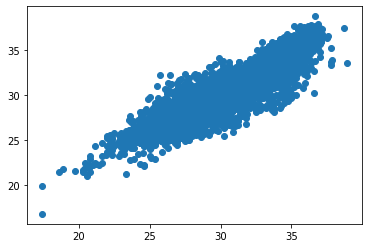

In [66]:
plt.scatter(x=y_test,y=predict_test)

Linear Regression Model for Next_Tmin

In [67]:
from sklearn.linear_model import LinearRegression
lr_min=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [68]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    lr_min.fit(p_train,q_train)
    pred_train_min=lr_min.predict(p_train)
    pred_test_min=lr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9926271626109531
At random state 0,the testing accuracy is:0.9917837206822862


At random state 1,the training accuracy is:0.993112754027566
At random state 1,the testing accuracy is:0.9913959436329016


At random state 2,the training accuracy is:0.9934105020007297
At random state 2,the testing accuracy is:0.9912819915922697


At random state 3,the training accuracy is:0.9921021988385028
At random state 3,the testing accuracy is:0.9919521319193425


At random state 4,the training accuracy is:0.9931986914187384
At random state 4,the testing accuracy is:0.9915057869627967


At random state 5,the training accuracy is:0.9929499887065881
At random state 5,the testing accuracy is:0.9916695428045792


At random state 6,the training accuracy is:0.992715043213458
At random state 6,the testing accuracy is:0.9917019312211905


At random state 7,the training accuracy is:0.9923859807896281
At random state 7,the testing accuracy is:0.9918356387589462


At

In [69]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=6)
lr_min.fit(p_train,q_train)

LinearRegression()

In [70]:
print(lr_min.intercept_)

22.927004045932588


In [71]:
coeff_df=pd.DataFrame(lr_min.coef_,p.columns,columns=['Co-efficient'])
coeff_df

Co-efficient
station          -1.140468e-05
Date             -4.412942e-02
Present_Tmax     -4.596055e-03
Present_Tmin      2.220226e-02
LDAPS_RHmin       7.418634e-02
LDAPS_RHmax       2.141924e-02
LDAPS_Tmax_lapse  1.008510e-01
LDAPS_Tmin_lapse -3.827201e-02
LDAPS_WS         -1.653425e-02
LDAPS_LH         -2.510248e-02
LDAPS_CC1        -3.332532e-03
LDAPS_CC2        -4.724366e-03
LDAPS_CC3         2.615115e-02
LDAPS_CC4         3.576866e-03
LDAPS_PPT1       -1.470130e-03
LDAPS_PPT2        1.034748e-02
LDAPS_PPT3       -1.451872e-02
LDAPS_PPT4       -2.634031e-02
lat               1.665335e-16
lon              -5.892294e-03
DEM              -1.274970e-02
Slope             7.131349e-03
Solar radiation   4.241806e-02
Next_Tmin         2.409689e+00

In [102]:
pred=lr_min.predict(p_test)

In [72]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df

Actual  Predicted
1236  24.00000  27.869819
981   27.60000  34.531147
7695  18.80000  29.431319
6012  26.50000  27.041395
492   25.00000  31.894202
3870  26.10000  26.312587
5032  19.60000  31.816274
6999  24.00000  28.482769
3129  20.40000  31.775518
7231  24.50000  27.491287
7656  17.60000  32.025969
3732  23.50000  31.811950
993   27.20000  25.790643
7661  16.50000  29.109936
1522  22.80000  27.396667
1973  23.90000  27.802485
5578  27.50000  26.770722
7737  17.40000  31.903833
2211  19.40000  34.643880
192   23.20000  30.894248
5819  25.40000  32.012907
5130  24.00000  30.128211
3895  26.00000  28.465544
5453  25.30000  26.430141
3393  23.10000  31.864993
947   25.60000  32.773768
6115  18.10000  30.708909
7053  25.60000  31.716337
6382  24.30000  28.985875
1766  23.40000  31.188817
344   23.00000  25.421195
4603  20.20000  28.933021
203   23.70000  30.320081
5550  24.30000  31.963074
4943  19.50000  31.784553
1400  21.30000  28.891590
5206  27.00000  30.506893
250   21.70000  29.453496
3722  24.20000  28.767413
4019  24.30000  32.871083
1546  21.30000  28.322712
7718  14.40000  28.884893
2426  23.60000  33.362628
3147  20.60000  28.399459
5840  23.40000  32.286397
3231  20.40000  28.546315
1256  23.70000  32.595725
5388  25.90000  25.498425
4527  21.40000  31.386852
2439  24.00000  32.772866
1196  27.10000  30.631949
614   22.00000  30.878632
341   22.80000  32.761518
6262  21.90000  29.557534
2743  21.10000  30.991485
4051  22.70000  31.522635
3992  26.60000  31.446388
4595  20.30000  32.162592
663   22.50000  29.204597
3941  23.70000  27.975371
2622  22.80000  33.511581
1858  22.60000  33.872960
7300  20.40000  30.723756
6497  24.90000  27.615298
4146  24.90000  28.669263
6328  23.80000  30.751368
5625  23.80000  32.117335
7355  20.70000  32.659214
1645  22.00000  28.016245
2700  20.00000  30.619531
2103  20.50000  28.390829
1785  25.20000  30.433022
7141  23.40000  35.274381
6030  24.30000  30.610687
847   26.80000  31.760214
4455  24.20000  31.970258
5801  24.70000  29.947301
1585  22.30000  37.468672
1761  23.50000  32.659583
6420  23.60000  25.712949
7364  20.70000  30.420115
3111  19.00000  32.573784
6491  22.30000  26.951242
6348  25.10000  31.783611
3867  26.40000  26.230100
4971  23.70000  30.265523
7497  24.00000  30.996392
1147  26.80000  31.911901
80    23.70000  31.700176
3521  18.00000  29.957414
6688  25.40000  33.782695
2012  25.30000  30.039789
7710  16.20000  32.263537
2863  21.40000  33.127460
5943  26.70000  31.597219
1130  26.50000  24.976599
6153  18.20000  30.839966
5195  25.60000  33.552592
3923  23.50000  26.390541
7601  16.90000  30.590019
6841  22.10000  28.305657
5088  20.70000  27.550054
5864  26.80000  27.543995
1214  25.20000  30.597378
4995  23.70000  31.613714
2620  22.50000  34.392216
2857  21.80000  34.270201
1510  23.30000  34.500735
3968  25.00000  32.033092
3596  22.60000  27.352921
3474  23.10000  33.405680
2070  24.80000  36.084247
1266  20.40000  27.455948
5339  26.20000  30.938491
2419  23.90000  24.828895
1232  25.90000  32.640998
940   23.40000  32.852279
3243  18.20000  27.302917
5474  23.00000  35.556553
3908  23.60000  35.017278
5312  27.00000  26.527747
7235  23.00000  30.049767
5654  25.80000  27.642582
6208  22.10000  31.343370
1694  22.00000  32.625658
2516  18.50000  27.083912
3506  18.70000  25.891043
2243  20.60000  26.851572
3251  19.30000  32.382234
268   23.50000  31.401288
229   24.30000  32.679923
4315  22.00000  31.591433
5563  27.20000  30.486487
6378  24.60000  32.766420
1707  21.10000  31.389995
3394  23.80000  28.520848
4931  21.90000  25.479562
476   23.10000  28.864518
5532  27.20000  27.752705
3900  21.40000  29.757031
348   23.50000  30.358919
1529  20.70000  33.352590
2023  24.80000  30.595848
2302  23.90000  28.715869
6284  21.20000  24.044737
6640  23.20000  30.361261
1045  23.70000  30.637937
3507  19.00000  27.532635
2075  22.00000  26.326939
2675  18.30000  28.267708
3669  24.90000  29.238111
4529  20.70000  27.550255
5843  24.30000  31.638144
4180

In [73]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 7.367361377437471
Mean squared error: 67.69050347495893
Root mean squared error: 8.227423866251144


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [74]:
predict_test=lr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.17019312211906


In [75]:
predict_train=lr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.2715043213458


Cross Validation score for Linear Regression model of Next_Tmin

In [76]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9897647999544502 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9889262293325481 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9897904305136653 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9884916660616238 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.988690967472227 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9899746193892842 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 98% & 99% respectively.

Lets plot with q_test vs prediction

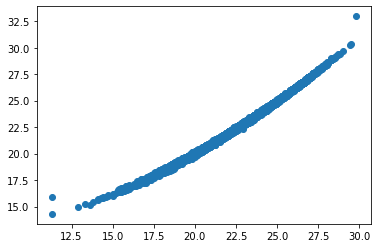

In [77]:
plt.scatter(x=q_test,y=predict_test)

# Decision Tree Regressor Model

Decision Tree Regressor Model for Next_Tmax

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtr_max=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [79]:
for i in range(0,10):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr_max.fit(x1_train,y1_train)
    pred_train_max=dtr_max.predict(x1_train)
    pred_test_max=dtr_max.predict(x1_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y1_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y1_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.7465265283835941


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.7454609943092863


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.7331728874303804


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.7238243544753225


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.726415447610306


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.7212248633315068


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.7411594772027856


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.729996257233344


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.7109007860321601


At random st

In [80]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.7,random_state=1)
dtr_max.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [81]:
pred=dtr_max.predict(x1_test)

In [82]:
df=pd.DataFrame({'Actual':y1_test,'Predicted':pred})
df

Actual  Predicted
6430  27.100000  26.200000
863   32.200000  31.900000
7001  33.100000  33.800000
5781  34.600000  34.500000
6977  33.300000  33.300000
4623  31.000000  31.000000
2004  30.800000  34.200000
1564  32.200000  32.000000
1913  31.900000  31.500000
2192  27.200000  27.000000
3178  29.900000  30.500000
3277  25.300000  26.500000
4550  25.800000  28.600000
2755  24.600000  25.300000
5011  27.700000  26.600000
7021  34.200000  34.400000
5524  36.800000  36.700000
1685  29.500000  29.900000
7646  27.400000  26.400000
6015  31.500000  32.700000
783   32.500000  32.600000
3234  29.600000  31.400000
1297  34.600000  33.900000
4137  31.300000  33.200000
2774  25.200000  25.300000
6698  36.200000  34.400000
3691  25.100000  25.700000
1749  30.000000  31.400000
5403  33.700000  33.300000
7513  31.600000  31.700000
3532  28.000000  27.700000
5600  31.600000  32.400000
6858  30.100000  26.400000
1406  32.000000  32.100000
5891  31.900000  31.400000
3856  31.400000  35.100000
6527  33.200000  33.600000
39    27.100000  28.800000
1790  32.900000  30.000000
4865  32.700000  32.400000
4974  30.600000  30.300000
5868  34.300000  33.900000
6763  28.200000  28.600000
3142  30.300000  28.400000
4514  25.500000  23.600000
4241  31.900000  33.600000
5609  34.400000  33.600000
695   26.600000  27.000000
2927  28.200000  30.274887
1669  29.200000  26.500000
3993  32.900000  31.300000
1064  33.100000  33.700000
5018  28.400000  26.400000
4158  32.600000  32.200000
4825  30.100000  31.700000
3658  31.500000  31.000000
2037  32.900000  32.100000
3282  25.700000  25.500000
1160  34.400000  33.200000
729   30.100000  30.400000
946   33.500000  32.800000
7028  35.700000  33.000000
5687  36.600000  36.000000
6468  31.600000  32.300000
1253  33.300000  33.500000
5051  23.300000  24.000000
3876  31.800000  29.800000
7590  30.800000  30.400000
1947  32.100000  31.300000
5506  35.700000  35.600000
4911  34.800000  34.800000
6772  29.400000  29.000000
4668  26.600000  26.800000
4148  32.200000  32.300000
7379  27.900000  30.200000
4252  30.600000  27.100000
5291  31.700000  31.300000
2900  27.900000  29.200000
5087  28.400000  28.000000
4843  33.600000  33.000000
2296  33.700000  31.300000
963   33.600000  32.400000
691   26.200000  26.900000
7289  27.700000  28.800000
2680  29.900000  30.900000
847   33.300000  33.000000
5053  23.600000  24.000000
4030  34.700000  34.500000
5670  33.100000  33.300000
130   31.000000  31.300000
4481  25.600000  25.300000
4023  34.100000  35.500000
6908  30.700000  30.200000
1475  24.200000  27.700000
975   28.400000  32.300000
1837  29.600000  29.800000
2115  24.500000  23.200000
3721  27.300000  28.300000
3258  30.100000  29.700000
1198  32.300000  31.600000
5892  35.000000  33.600000
7475  26.600000  27.100000
186   25.200000  25.500000
5954  34.500000  34.500000
3227  31.900000  31.700000
2487  27.600000  27.600000
2202  29.600000  29.900000
664   30.400000  31.700000
2685  29.600000  28.600000
3544  27.600000  26.300000
1169  32.000000  32.300000
6201  30.000000  28.800000
2717  32.300000  30.300000
982   31.100000  31.600000
2593  28.100000  28.700000
4179  30.900000  30.500000
871   33.500000  31.800000
2696  30.300000  31.000000
276   24.300000  26.000000
2809  28.100000  28.500000
4071  34.500000  31.700000
1060  34.900000  35.600000
5163  32.100000  32.200000
7401  29.000000  29.300000
5075  25.700000  27.400000
4495  25.200000  24.900000
763   29.700000  32.600000
6391  28.600000  30.000000
6951  25.900000  27.800000
1628  32.800000  33.200000
2169  33.600000  34.300000
4749  24.200000  24.700000
2253  31.300000  30.000000
4489  24.700000  24.100000
1936  31.900000  27.500000
3197  30.200000  30.800000
5914  35.300000  32.700000
4447  32.400000  33.200000
4524  25.700000  25.300000
4744  24.100000  23.300000
6160  24.600000  24.600000
6433  26.400000  25.400000
325   23.200000  23.200000
4247  32.100000  31.900000
1610  25.300000  25.000000
3631  31.700000  32.500000
45    28.200000  28.800000
4192  32.4000

In [83]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y1_test,pred))
print("Mean squared error:",mean_squared_error(y1_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred)))

error:
Mean absolute error: 1.1298137265249921
Mean squared error: 2.4208493506782482
Root mean squared error: 1.5559078863089062


In Decision Tree Regressor model, The Root mean squared error value is slightly lower when compare with linear regressor model.but still we should compare with more model.

In [84]:
predict_test=dtr_max.predict(x1_test)
print(r2_score(y1_test,predict_test)*100)

74.83365807905813


In [85]:
predict_train=dtr_max.predict(x1_train)
print(r2_score(y1_train,predict_train)*100)

100.0


Cross validation score of Next_Tmax

In [86]:
Train_accuracy=r2_score(y1_train,predict_train)
Test_accuracy=r2_score(y1_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.42411677342283316 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7483365807905812


At cross fold(j) the cv score is 0.4581332088299283 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7483365807905812


At cross fold(j) the cv score is 0.4072060923400447 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7483365807905812


At cross fold(j) the cv score is 0.383474755929384 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7483365807905812


At cross fold(j) the cv score is 0.42482480252282406 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7483365807905812


At cross fold(j) the cv score is 0.4218438646317832 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7483365807905812


At cross fold(j) the cv score is 0.38382070658413914 and accuracy score for training is 1.0 and accuracy score  for t

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 100% & 73% respectively.

Lets plot with y_test vs prediction

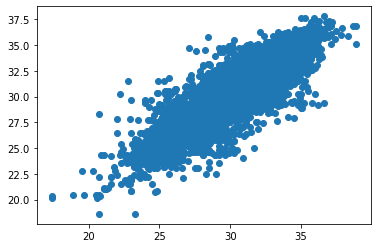

In [87]:
plt.scatter(x=y1_test,y=predict_test)

Decision Tree Regressor model for Next_Tmin

In [88]:
from sklearn.tree import DecisionTreeRegressor
dtr_min=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [89]:
for i in range(0,10):
    p1_train,p1_test,q1_train,q1_test=train_test_split(p,q,test_size=0.7,random_state=i)
    dtr_min.fit(p1_train,q1_train)
    pred_train_min=dtr_min.predict(p1_train)
    pred_test_min=dtr_min.predict(p1_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q1_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q1_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.9995446120489898


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.9995412039226577


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.9986409267497268


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.9998228780585976


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.9983510257898369


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.9989703014979903


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.9996768666849823


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.9990869900316574


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.9998150749415682


At random 

In [90]:
p1_train,p1_test,q1_train,q1_test=train_test_split(p,q,test_size=0.7,random_state=2)
dtr_min.fit(p1_train,q1_train)

DecisionTreeRegressor()

In [91]:
pred=dtr_min.predict(p1_test)

In [92]:
df=pd.DataFrame({'Actual':q1_test,'Predicted':pred})
df

Actual  Predicted
6867  24.40000   24.40000
5157  25.20000   25.20000
6851  23.40000   23.40000
4553  18.90000   18.90000
727   23.60000   23.60000
7209  22.90000   22.90000
3054  19.80000   19.80000
4562  19.80000   19.80000
849   27.00000   27.00000
2138  18.80000   18.80000
1990  20.40000   20.40000
5562  27.20000   27.20000
2623  22.90000   22.90000
2140  18.10000   18.10000
3308  22.30000   22.30000
7721  17.30000   17.30000
4299  20.90000   20.90000
5912  27.30000   27.30000
6458  22.20000   22.20000
4914  24.60000   24.60000
5455  24.10000   24.10000
958   26.00000   26.00000
723   24.50000   24.50000
7456  22.30000   22.30000
6116  17.10000   17.00000
4082  23.60000   23.60000
5620  26.70000   26.70000
2093  23.80000   23.80000
3713  23.90000   23.90000
7492  23.50000   23.50000
2765  19.60000   19.60000
6370  24.80000   24.80000
7575  19.20000   19.20000
7444  22.20000   22.20000
273   24.20000   24.20000
5706  26.90000   26.90000
4925  20.50000   20.50000
2947  25.00000   25.00000
6879  23.50000   23.50000
2784  19.90000   19.90000
6956  24.60000   24.60000
7357  20.60000   20.60000
2220  21.20000   21.20000
4202  22.30000   22.30000
545   23.90000   23.90000
4725  18.50000   18.50000
955   27.40000   27.40000
5297  26.10000   26.10000
4853  23.20000   23.20000
7199  24.10000   24.10000
6071  20.50000   20.50000
7579  21.50000   21.50000
6355  25.10000   25.10000
1553  21.50000   21.50000
6628  23.50000   23.50000
1064  25.80000   25.80000
1457  23.50000   23.50000
2108  20.90000   20.90000
4549  22.30000   22.30000
3960  25.70000   25.70000
2576  16.80000   16.80000
4726  18.80000   18.80000
3319  22.30000   22.30000
4272  21.50000   21.50000
2083  24.20000   24.20000
1796  25.30000   25.30000
5217  27.60000   27.60000
4404  22.90000   22.90000
689   23.00000   23.00000
2032  24.50000   24.50000
3689  21.90000   21.90000
1261  22.70000   22.70000
6551  22.60000   22.60000
4745  20.40000   20.40000
6671  25.30000   25.30000
1591  20.70000   20.70000
1783  24.00000   24.00000
5174  25.70000   25.70000
1992  21.50000   21.50000
3084  18.70000   18.70000
5740  24.50000   24.50000
88    22.70000   22.70000
5806  26.40000   26.40000
4718  19.70000   19.70000
1993  21.40000   21.40000
202   23.40000   23.40000
2184  20.30000   20.30000
3140  18.60000   18.60000
6201  21.70000   21.70000
3984  23.70000   23.70000
1153  26.80000   26.80000
814   24.50000   24.50000
3843  25.00000   25.00000
6324  24.00000   24.00000
2079  24.50000   24.50000
1703  20.90000   20.90000
5819  25.40000   25.40000
2175  17.90000   17.90000
6295  23.60000   23.60000
5168  24.60000   24.60000
7372  21.30000   21.30000
4031  25.80000   25.80000
15    20.90000   20.90000
1164  24.70000   24.70000
916   22.50000   22.50000
4519  20.50000   20.50000
7169  24.90000   24.90000
2394  23.90000   23.90000
4938  21.60000   21.60000
1400  21.30000   21.30000
6264  21.90000   21.90000
6596  23.20000   23.20000
6907  22.93222   22.93222
7309  20.90000   20.90000
7167  24.50000   24.50000
6243  21.50000   21.50000
942   24.90000   24.90000
6645  23.50000   23.50000
2008  24.00000   24.00000
6055  20.10000   20.10000
369   23.40000   23.40000
3793  23.60000   23.60000
642   24.40000   24.40000
686   22.20000   22.20000
1605  21.60000   21.60000
5906  28.10000   28.00000
2450  20.00000   20.00000
6230  22.50000   22.50000
5835  24.40000   24.40000
3947  26.00000   26.00000
6828  24.60000   24.60000
1030  24.20000   24.20000
7731  18.60000   18.60000
3509  18.70000   18.70000
2670  21.30000   21.30000
6321  24.00000   24.00000
719   23.90000   23.90000
4748  20.70000   20.70000
2399  24.20000   24.20000
5781  26.00000   26.00000
4954  21.80000   21.80000
3747  23.60000   23.60000
5049  19.70000   19.70000
5807  26.10000   26.10000
5165  22.80000   22.80000
6154  17.00000   17.00000
2356  29.40000   29.50000
1447  24.20000   24.20000
5931  27.50000   27.50000
7378  21.50000   21.50000
4480  20.30000   20.30000
5520  26.60000   26.60000
291   23.00000   23.00000
1836

In [93]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q1_test,pred))
print("Mean squared error:",mean_squared_error(q1_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q1_test,pred)))

error:
Mean absolute error: 0.005454210429339733
Mean squared error: 0.007385295743504697
Root mean squared error: 0.08593774341640986


In Decision Tree Regressor model, The Root mean squared error value is slightly better when compare with linear regressor model but still we should compare with more model.

In [94]:
predict_test=dtr_min.predict(p1_test)
print(r2_score(q1_test,predict_test)*100)

99.88163481992406


In [95]:
predict_train=dtr_min.predict(p1_train)
print(r2_score(q1_train,predict_train)*100)

100.0


The Cross validation score for Next_Tmin

In [96]:
Train_accuracy=r2_score(q1_train,predict_train)
Test_accuracy=r2_score(q1_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9995177048992052 and accuracy score for training is 1.0 and accuracy score  for testing 0.9988163481992406


At cross fold(j) the cv score is 0.9993575069402963 and accuracy score for training is 1.0 and accuracy score  for testing 0.9988163481992406


At cross fold(j) the cv score is 0.9994483091332059 and accuracy score for training is 1.0 and accuracy score  for testing 0.9988163481992406


At cross fold(j) the cv score is 0.9994322610785238 and accuracy score for training is 1.0 and accuracy score  for testing 0.9988163481992406


At cross fold(j) the cv score is 0.9995470116381918 and accuracy score for training is 1.0 and accuracy score  for testing 0.9988163481992406


At cross fold(j) the cv score is 0.9995975722588998 and accuracy score for training is 1.0 and accuracy score  for testing 0.9988163481992406


At cross fold(j) the cv score is 0.9995971036501634 and accuracy score for training is 1.0 and accuracy score  for testing 0.99881634819

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 100% & 99% respectively.

Lets plot with q_test vs prediction

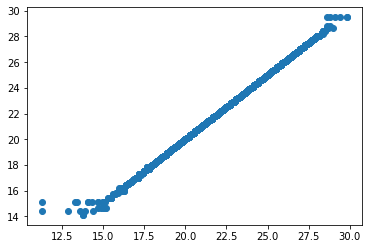

In [97]:
plt.scatter(x=q1_test,y=predict_test)

# Random Forest Regressor Model

Random Forest Regressor model for T_max

In [154]:
from sklearn.ensemble import RandomForestRegressor
rdr_max=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [155]:
for i in range(0,10):
    x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr_max.fit(x2_train,y2_train)
    pred_train_max=rdr_max.predict(x2_train)
    pred_test_max=rdr_max.predict(x2_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y2_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y2_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.9827814402469158
At random state 0,the testing accuracy is:0.8797150395642195


At random state 1,the training accuracy is:0.9823335865442627
At random state 1,the testing accuracy is:0.8770045242890042


At random state 2,the training accuracy is:0.9835056670690359
At random state 2,the testing accuracy is:0.8743450950094814


At random state 3,the training accuracy is:0.9828922230625842
At random state 3,the testing accuracy is:0.8770811796098522


At random state 4,the training accuracy is:0.9819260152933698
At random state 4,the testing accuracy is:0.8724951131283931


At random state 5,the training accuracy is:0.9832326894347221
At random state 5,the testing accuracy is:0.8797966619961726


At random state 6,the training accuracy is:0.9831771191092478
At random state 6,the testing accuracy is:0.8747086679598686


At random state 7,the training accuracy is:0.9816705077623945
At random state 7,the testing accuracy is:0.8767325882839964




In [156]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.7,random_state=9)
rdr_max.fit(x2_train,y2_train)

RandomForestRegressor()

In [157]:
pred=rdr_max.predict(x2_test)

In [158]:
df=pd.DataFrame({'Actual':y2_test,'Predicted':pred})
df

Actual  Predicted
978   32.700000  33.397247
5144  32.700000  31.832000
4818  29.500000  28.468000
4433  31.500000  31.967000
5714  35.300000  35.536000
1390  31.100000  31.919000
3194  29.600000  28.249000
4081  30.800000  31.478749
6919  29.300000  28.662000
6559  25.200000  28.331749
3541  26.900000  27.399000
4598  31.400000  30.624000
1221  33.600000  32.610000
1160  34.400000  33.415000
2984  28.700000  28.439000
3067  31.100000  29.805000
1901  31.100000  29.541000
4017  35.700000  35.173000
5161  31.800000  32.134000
960   34.900000  33.739000
4917  37.800000  34.140000
4621  31.800000  31.611000
4290  31.900000  32.288000
5671  34.600000  34.519000
1923  31.700000  30.916000
5559  34.000000  34.618000
5638  33.700000  33.560000
3485  27.900000  28.966000
7353  26.300000  24.864749
4047  36.000000  35.586000
6608  29.900000  29.380000
1857  27.800000  29.760000
3410  25.800000  25.477749
1554  31.700000  32.104749
3819  29.300000  29.279749
6153  24.800000  23.946247
203   27.200000  29.438000
2019  30.300000  31.287000
2891  29.500000  29.216000
6240  26.900000  27.445000
748   30.700000  31.318000
4404  30.100000  30.542995
3118  28.200000  26.965000
2012  30.600000  32.267000
2762  24.200000  24.632000
4802  28.700000  28.513000
4969  29.200000  28.609000
4167  35.300000  33.240000
4747  25.100000  25.149000
4440  31.700000  31.668000
1932  31.700000  30.711000
6165  23.900000  23.975000
1959  28.000000  29.189000
7593  30.900000  30.679000
2844  24.600000  24.861722
3425  28.900000  28.442000
4602  30.400000  31.363000
216   27.100000  28.022000
217   29.000000  28.894000
827   32.700000  32.480000
1278  33.400000  31.921000
2887  29.800000  29.588000
6784  26.200000  29.385000
7535  30.700000  30.453498
7406  30.200000  29.387000
6468  31.600000  31.013000
4681  28.400000  28.256749
6089  28.200000  29.283000
3453  34.800000  32.566000
5524  36.800000  35.601000
7270  32.000000  32.147000
4575  26.800000  28.471000
7660  26.700000  27.182000
4817  30.100000  28.056000
5889  33.000000  33.068000
1383  32.200000  32.100000
3413  25.500000  25.838749
7653  26.300000  25.181749
5684  35.200000  33.881000
6408  31.600000  30.230000
2482  26.500000  28.301749
5760  30.700000  32.505000
5886  32.600000  32.100000
6655  34.200000  33.332000
1842  30.200000  29.407749
7379  27.900000  28.389498
3084  28.000000  27.823000
5324  30.100000  30.694000
5063  24.000000  24.376000
7274  32.800000  31.808000
5080  28.300000  28.750000
4760  25.700000  25.796498
7500  29.600000  28.772000
4117  33.500000  32.718000
7036  33.100000  33.262000
1793  33.800000  33.444000
7471  26.200000  26.183498
2462  26.800000  28.559498
4190  30.200000  31.917000
5238  30.400000  30.727000
6665  32.300000  31.966749
1340  27.700000  29.447749
1902  31.600000  30.096000
2256  29.100000  29.774000
4508  25.500000  24.656749
935   33.300000  33.142000
2033  32.200000  31.140000
4103  32.700000  31.606749
1564  32.200000  31.950000
954   33.500000  32.905000
759   28.600000  28.497749
5849  35.900000  34.933000
4565  26.500000  29.154000
2718  30.700000  30.415000
6985  33.300000  33.610000
6490  30.500000  30.090000
193   25.600000  26.167749
1831  29.000000  28.995749
7103  33.400000  33.837000
1791  33.100000  33.127000
437   26.600000  27.801000
1868  29.700000  29.786000
5321  29.900000  29.322000
2166  34.000000  32.727000
497   31.200000  31.776000
1486  25.500000  27.302000
2596  27.900000  29.074000
3906  30.000000  29.122749
3261  28.900000  29.497000
6905  30.900000  30.755000
5180  34.100000  32.730000
5429  31.600000  32.632000
734   29.100000  29.977000
6886  25.200000  26.205000
3002  30.200000  29.915000
2335  34.900000  33.867000
3987  33.800000  32.687000
2536  29.700000  30.603000
207   27.200000  27.595000
2058  31.700000  31.424000
5094  27.600000  27.660000
896   31.000000  32.179749
3632  31.700000  31.978000
886   29.900000  30.900000
5811  35.100000  33.379000
6806  35.700000  33.324000
6579  28.400000  29.509749
4449  32.8000

In [159]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y2_test,pred))
print("Mean squared error:",mean_squared_error(y2_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred)))

error:
Mean absolute error: 0.8173463396191759
Mean squared error: 1.149286574620575
Root mean squared error: 1.0720478415726487


In Random Forest Regressor model, The root mean squared error value is low when comapred with Decision tree regressor.so this is our best model.

In [160]:
predict_test=rdr_max.predict(x2_test)
print(r2_score(y2_test,predict_test)*100)

88.2128862404799


In [161]:
predict_train=rdr_max.predict(x2_train)
print(r2_score(y2_train,predict_train)*100)

98.21031189099408


The Cross validation Score for Next_Tmax

In [105]:
Train_accuracy=r2_score(y2_train,predict_train)
Test_accuracy=r2_score(y2_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6265266815452313 and accuracy score for training is 0.9814303459962173 and accuracy score  for testing is 0.8807651463790448


At cross fold(j) the cv score is 0.7061955176775191 and accuracy score for training is 0.9814303459962173 and accuracy score  for testing is 0.8807651463790448


At cross fold(j) the cv score is 0.6845844309803089 and accuracy score for training is 0.9814303459962173 and accuracy score  for testing is 0.8807651463790448


At cross fold(j) the cv score is 0.6592712032698275 and accuracy score for training is 0.9814303459962173 and accuracy score  for testing is 0.8807651463790448


At cross fold(j) the cv score is 0.6889084893296852 and accuracy score for training is 0.9814303459962173 and accuracy score  for testing is 0.8807651463790448


At cross fold(j) the cv score is 0.6891912688207539 and accuracy score for training is 0.9814303459962173 and accuracy score  for testing is 0.8807651463790448


At cross fold(j) the cv scor

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 98% & 88% respectively.

Lets plot with y_test vs prediction

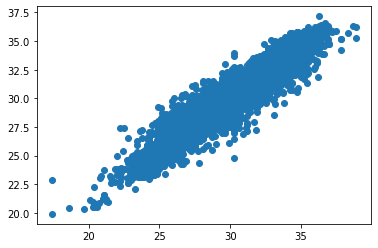

In [107]:
plt.scatter(x=y2_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

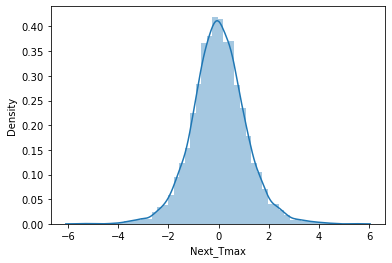

In [108]:
sns.distplot((y2_test-predict_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Random Forest Regressor model for Next_tmin

In [109]:
from sklearn.ensemble import RandomForestRegressor
rdr_min=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [110]:
for i in range(0,10):
    p2_train,p2_test,q2_train,q2_test=train_test_split(p,q,test_size=0.7,random_state=i)
    rdr_min.fit(p2_train,q2_train)
    pred_train_min=rdr_min.predict(p2_train)
    pred_test_min=rdr_min.predict(p2_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q2_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q2_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9999042545971132
At random state 0,the testing accuracy is:0.999744473179412


At random state 1,the training accuracy is:0.9999750114617811
At random state 1,the testing accuracy is:0.9992971317878998


At random state 2,the training accuracy is:0.9999731846227922
At random state 2,the testing accuracy is:0.9988730106563839


At random state 3,the training accuracy is:0.9999149858056638
At random state 3,the testing accuracy is:0.9997443688993537


At random state 4,the training accuracy is:0.9999670146572794
At random state 4,the testing accuracy is:0.9987924276878487


At random state 5,the training accuracy is:0.9999660875581826
At random state 5,the testing accuracy is:0.9993716803312508


At random state 6,the training accuracy is:0.9999798137868466
At random state 6,the testing accuracy is:0.9995014004488763


At random state 7,the training accuracy is:0.99994226137978
At random state 7,the testing accuracy is:0.9996698783090634


At 

In [111]:
p2_train,p2_test,q2_train,q2_test=train_test_split(p,q,test_size=0.7,random_state=3)
rdr_min.fit(p2_train,q2_train)

RandomForestRegressor()

In [112]:
pred=rdr_min.predict(p2_test)

In [113]:
df=pd.DataFrame({'Actual':q2_test,'Predicted':pred})
df

Actual  Predicted
3473  23.90000  23.900000
4556  20.80000  20.800000
5860  25.20000  25.200000
6274  22.60000  22.600000
2410  24.20000  24.200000
2437  25.20000  25.200000
6372  25.40000  25.400000
2752  20.40000  20.400000
330   23.50000  23.500000
6987  23.90000  23.900000
1548  21.70000  21.700000
1604  21.10000  21.100000
3011  18.80000  18.784000
7354  20.30000  20.300000
3249  21.30000  21.300000
1704  19.40000  19.398000
6899  24.60000  24.600000
1119  24.70000  24.700000
4333  24.10000  24.100000
2509  19.70000  19.700000
1460  22.90000  22.900644
3938  25.30000  25.300000
3638  24.50000  24.500000
200   21.60000  21.600000
4979  23.50000  23.500000
4147  25.20000  25.200000
7304  22.93222  22.924487
2878  23.10000  23.100000
7595  23.10000  23.100000
6631  23.50000  23.500000
434   23.60000  23.600000
7331  21.20000  21.200000
4339  24.70000  24.700000
5384  25.10000  25.100000
1207  27.20000  27.201000
5422  26.50000  26.500000
3078  21.10000  21.100000
20    24.00000  24.000000
1295  24.90000  24.900000
5672  26.30000  26.300000
2131  18.70000  18.707000
3635  25.60000  25.600000
3445  22.40000  22.400000
3004  19.00000  18.994000
7132  25.30000  25.300000
1134  23.80000  23.800000
1529  20.70000  20.700000
175   20.20000  20.200000
404   24.30000  24.300000
5328  26.40000  26.401000
5717  27.80000  27.808000
1619  20.90000  20.900000
6573  23.20000  23.200000
7075  25.30000  25.300000
7448  24.00000  24.000000
2363  27.70000  27.689000
3900  21.40000  21.400000
6482  24.70000  24.700000
3375  21.20000  21.200000
6178  16.70000  16.649000
5951  23.70000  23.700000
261   22.70000  22.700000
3028  20.80000  20.800000
1710  21.30000  21.300000
5092  21.40000  21.400000
4623  22.40000  22.400000
2712  22.50000  22.500000
6593  22.90000  22.900322
5186  24.00000  24.000000
5024  23.30000  23.300000
2698  21.60000  21.600000
4883  21.80000  21.800000
3706  24.20000  24.200000
3707  24.10000  24.100000
7123  26.20000  26.200000
2543  20.40000  20.400000
1510  23.30000  23.300000
5827  25.70000  25.700000
2605  23.10000  23.100000
3955  25.80000  25.800000
1832  21.80000  21.800000
2815  20.80000  20.800000
5500  23.60000  23.600000
1968  22.40000  22.400000
331   23.20000  23.200000
7492  23.50000  23.500000
1075  23.60000  23.600000
1680  23.50000  23.500000
4345  24.90000  24.900000
3032  20.00000  20.000000
6804  24.20000  24.200000
1875  20.00000  20.000000
4771  20.80000  20.800000
5929  26.00000  26.000000
7651  17.30000  17.295000
7571  22.93222  22.927387
5075  18.20000  18.212000
4305  24.70000  24.700000
3867  26.40000  26.401000
2063  23.80000  23.800000
24    24.20000  24.200000
808   25.10000  25.100000
3396  22.40000  22.400000
1585  22.30000  22.300000
322   22.60000  22.600000
41    21.70000  21.700000
7410  23.10000  23.100000
292   23.70000  23.700000
591   23.30000  23.300000
3690  21.60000  21.600000
3111  19.00000  18.999000
4953  23.30000  23.300000
4733  20.50000  20.500000
5693  24.80000  24.800000
1263  23.30000  23.300000
6506  24.20000  24.200000
3439  21.90000  21.900000
641   20.90000  20.900000
377   25.30000  25.300000
1743  22.10000  22.100000
3227  19.50000  19.500000
4362  24.00000  24.000000
7494  23.10000  23.100000
5697  26.80000  26.800000
1397  23.30000  23.300000
6715  26.50000  26.500000
1831  22.50000  22.500000
3960  25.70000  25.700000
3392  24.00000  24.000000
1902  23.50000  23.500000
2633  21.30000  21.300000
5948  28.70000  28.783000
5889  27.60000  27.611000
3857  26.10000  26.100000
2929  22.50000  22.500000
4236  22.40000  22.400000
850   23.20000  23.200000
3520  19.30000  19.301000
3887  26.60000  26.600000
6380  24.60000  24.600000
3034  16.60000  16.593000
3409  20.60000  20.600000
3200  17.60000  17.602000
1674  23.20000  23.200000
2493  21.40000  21.400000
3210  20.50000  20.500000
7453  21.80000  21.800000
5744  25.90000  25.900000
7220  23.50000  23.500000
6375  22.60000  22.600000
454   23.40000  23.400000
3659  23.00000  23.000000
529   23.20000  23.200000
5193

In [114]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q2_test,pred))
print("Mean squared error:",mean_squared_error(q2_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q2_test,pred)))

error:
Mean absolute error: 0.0033709981317382944
Mean squared error: 0.001445668631197418
Root mean squared error: 0.03802194933452805


In Random Forest Regressor model, The root mean squared error value is low when comapred with other models.so this is our best model.

In [115]:
predict_test=rdr_min.predict(p2_test)
print(r2_score(q2_test,predict_test)*100)

99.97652642505274


In [116]:
predict_train=rdr_min.predict(p2_train)
print(r2_score(q2_train,predict_train)*100)

99.99187568125825


Cross validation score for Tmin.

In [117]:
Train_accuracy=r2_score(q2_train,predict_train)
Test_accuracy=r2_score(q2_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is{Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9993250504674227 and accuracy score for training is 0.9999187568125825 and accuracy score for testing is0.9997652642505274


At cross fold(j) the cv score is 0.9993940748738573 and accuracy score for training is 0.9999187568125825 and accuracy score for testing is0.9997652642505274


At cross fold(j) the cv score is 0.9994545772702205 and accuracy score for training is 0.9999187568125825 and accuracy score for testing is0.9997652642505274


At cross fold(j) the cv score is 0.9998107138137169 and accuracy score for training is 0.9999187568125825 and accuracy score for testing is0.9997652642505274


At cross fold(j) the cv score is 0.9997810666780199 and accuracy score for training is 0.9999187568125825 and accuracy score for testing is0.9997652642505274


At cross fold(j) the cv score is 0.9998167529324643 and accuracy score for training is 0.9999187568125825 and accuracy score for testing is0.9997652642505274


At cross fold(j) the cv score is 0.99982

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 98% & 99% respectively.

Lets plot with q_test vs prediction

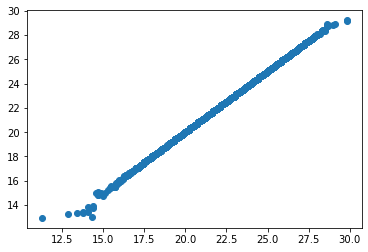

In [118]:
plt.scatter(x=q2_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

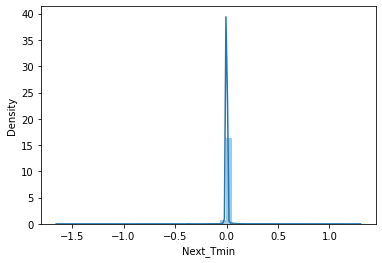

In [119]:
sns.distplot((q2_test-predict_test))

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Hyper Parameter Tuning

Hyper Parameter Tuning for Linear Regression of Tmax

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [121]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
ls=r2_score(y_test,pred_decision)
print('R2 Score:',ls*100)

R2 Score: 78.53104751654544


Hyper Parameter Tuning for Linear Regression of Tmin

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [123]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
ls=r2_score(y_test,pred_decision)
print('R2 Score:',ls*100)

R2 Score: 78.52798356763053


Hyper Parameter Tuning for Decision Tree Regressor of Tmax

In [124]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [125]:
GCV.best_params_

{'max_depth': 8, 'random_state': 2}

In [126]:
dtr=DecisionTreeRegressor(max_depth=8,random_state=2)

dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)
pred_decision=dtr.predict(x1_test)
dtr=r2_score(y1_test,pred_decision)
print('R2 Score:',dtr*100)

R2 Score: 75.8994182433672


Hyper Parameter Tuning for Decision Tree Regressor of Tmin

In [127]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(p1_train,q1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [128]:
GCV.best_params_

{'max_depth': 10, 'random_state': 2}

In [129]:
dtr=DecisionTreeRegressor(max_depth=10,random_state=2)

dtr.fit(p1_train,q1_train)
dtr.score(p1_train,q1_train)
pred_decision=dtr.predict(p1_test)
dtr=r2_score(q1_test,pred_decision)
print('R2 Score:',dtr*100)

R2 Score: 99.900742173095


Hyper Parameter Tuning for Random Forest Regressor of Tmax

In [130]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x2_train,y2_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 1}


In [131]:
rdr=RandomForestRegressor(criterion='mse',max_features='sqrt',random_state=1)
rdr.fit(x2_train,y2_train)
rdr.score(x2_train,y2_train)
pred_decision=rdr.predict(x2_test)
rdr=r2_score(y2_test,pred_decision)
print('R2 Score:',rdr*100)

R2 Score: 88.54476210060305


Hyper Parameter Tuning for Random Forest Regressor of Tmin

In [132]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(p2_train,q2_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'random_state': 5}


In [133]:
rdr=RandomForestRegressor(criterion='mse',max_features='auto',random_state=5)
rdr.fit(p2_train,q2_train)
rdr.score(p2_train,q2_train)
pred_decision=rdr.predict(p2_test)
rdr=r2_score(q2_test,pred_decision)
print('R2 Score:',rdr*100)

R2 Score: 99.97628148924626


Compare with Actual Final Vs Sample Prediction for Tmax

Y2 Test  Prediction
978      32.7        23.9
5144     32.7        20.8
4818     29.5        25.2
4433     31.5        22.6
5714     35.3        24.2

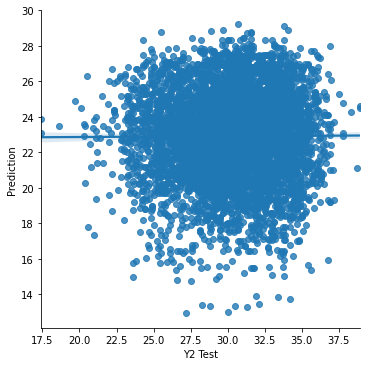

In [134]:
data=pd.DataFrame({'Y2 Test':y2_test , 'Prediction':predict_test},columns=['Y2 Test','Prediction'])
sns.lmplot(x='Y2 Test',y='Prediction',data=data,palette='rainbow')
data.head()

Compare with Actual Final Vs Sample Prediction for Tmin

Q2 Test  Prediction
3473     23.9        23.9
4556     20.8        20.8
5860     25.2        25.2
6274     22.6        22.6
2410     24.2        24.2

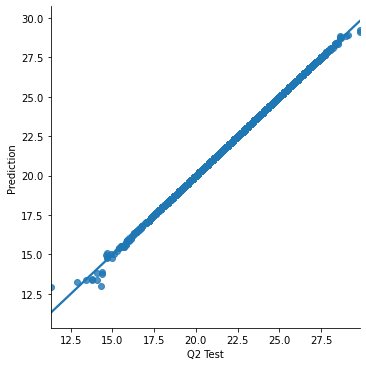

In [135]:
data=pd.DataFrame({'Q2 Test':q2_test , 'Prediction':predict_test},columns=['Q2 Test','Prediction'])
sns.lmplot(x='Q2 Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Model Saving

In [136]:
from operator import mod

In [137]:
import joblib
joblib.dump(mod,"Temperature Forecast Project using ML.pkl")

['Temperature Forecast Project using ML.pkl']

# Loading the saved model

In [138]:
model=joblib.load("Temperature Forecast Project using ML.pkl")

In [140]:
prediction_min=rdr_min.predict(p2_test)
print(r2_score(q2_test,predict_test)*100)

99.97652642505274


In [142]:
prediction_min=pd.DataFrame(prediction_min)  # Converting into Data Frame
prediction_min.to_csv('Result of Temperature Forecast Project using ML.csv')
prediction_min.head()

0
0  23.9
1  20.8
2  25.2
3  22.6
4  24.2

In [163]:
prediction_max=rdr_max.predict(x2_test)
print(r2_score(y2_test,predict_test)*100)

88.2128862404799


In [164]:
prediction_max=pd.DataFrame(prediction_max)  # Converting into Data Frame
prediction_max.to_csv('Result of Temperature Forecast Project  for Tmax using ML.csv')
prediction_max.head()

0
0  33.397247
1  31.832000
2  28.468000
3  31.967000
4  35.536000